# Import the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Import Data

In [4]:
path = ""
train_data = pd.read_csv(path + "train.csv")

In [5]:
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [6]:
train_data.shape

(14999, 9)

In [7]:
train_data.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


#### Converting Category Feature

In [9]:
# Assigning Each category a number for Category Feature
category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
train_data["category"] = train_data["category"].map(category)
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [10]:
# Removing character 'F' from the data
train_data = train_data[train_data.views != 'F']
train_data = train_data[train_data.likes != 'F']
train_data = train_data[train_data.dislikes != 'F']
train_data = train_data[train_data.comment != 'F']

In [11]:
# Convert the values to integer for views, likes, dislikes, comments and adviews
train_data['views'] = pd.to_numeric(train_data['views'])
train_data['comment'] = pd.to_numeric(train_data['comment'])
train_data['likes'] = pd.to_numeric(train_data['likes'])
train_data['dislikes'] = pd.to_numeric(train_data['dislikes'])
train_data['adview'] = pd.to_numeric(train_data['adview'])

In [12]:
column_vidid = train_data['vidid']

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Encoding

In [15]:
# Encoding features like category, duration, vidid
from sklearn.preprocessing import LabelEncoder
train_data['duration'] = LabelEncoder().fit_transform(train_data['duration'])
train_data['vidid'] = LabelEncoder().fit_transform(train_data['vidid'])
train_data['published'] = LabelEncoder().fit_transform(train_data['published'])

In [16]:
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


# Converting Time into Seconds

In [18]:
# convert time_in_sec for duration
import datetime
import time

In [19]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm += i
        else:
            if (i == 'H'):
                h = mm
                mm = ''
            elif(i ==  'M'):
                m == mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h == ''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s == ''):
        s = '00'
    bp = h+':'+m+':'+s
    return bp

In [20]:
train = pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)

In [21]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [22]:
time1 = time.apply(func_sec)

In [23]:
train_data['duration'] = time1
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,37,6
1,2741,2,1707,56,2,6,2185,30,4
2,8138,1,2023,25,0,2,2094,16,3
3,9005,6,620860,777,161,153,2119,22,8
4,122,1,666,1,0,0,2091,31,4


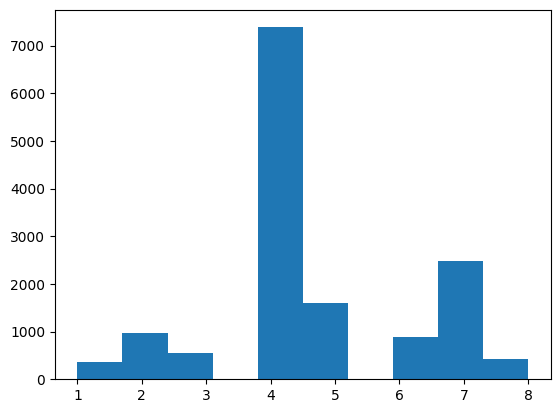

In [24]:
plt.hist(train_data['category'])
plt.show()

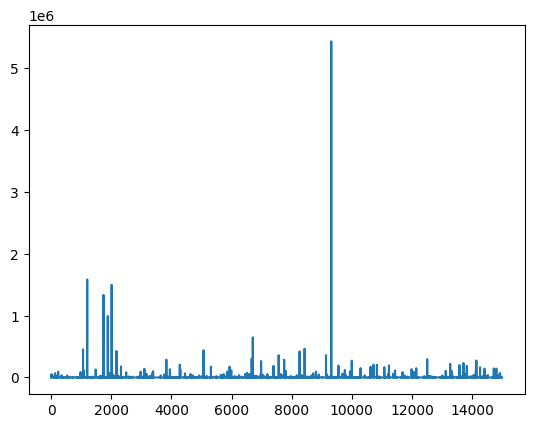

In [25]:
plt.plot(train_data['adview'])
plt.show()

In [26]:
train_data = train_data[train_data['adview'] < 2000000]
# taking the data of videos with less than 2M views

In [27]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Correlation with Heatmap

In [29]:
import seaborn as sns

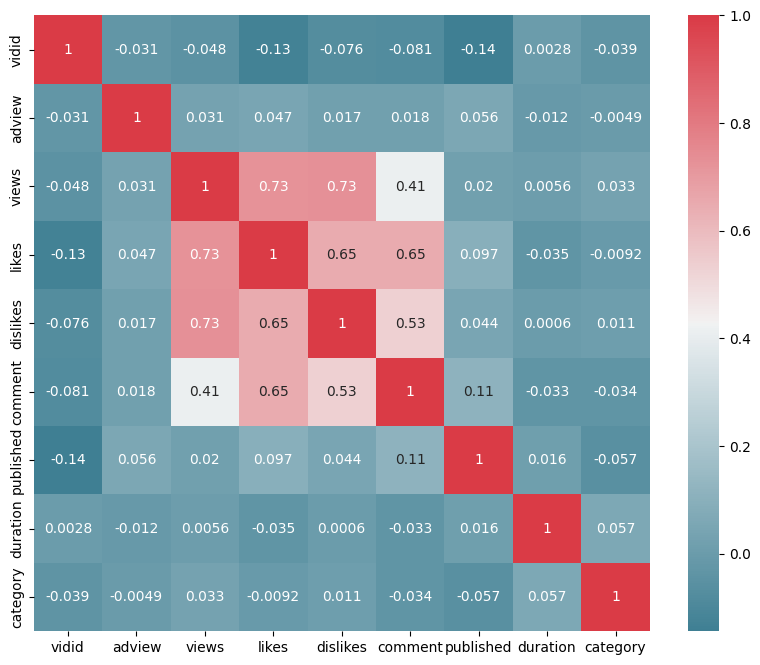

In [30]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
           square=True, ax=ax, annot=True)
plt.show()

# Splitting Data into Train and Test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# split data
y_train = pd.DataFrame(data = train_data.iloc[:,1].values, columns=['target'])
train_data = train_data.drop(['adview'], axis = 1)
train_data = train_data.drop(['vidid'], axis = 1)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data, y_train, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(11708, 7)

# Normalising Data

In [37]:
### NORMALISE DATA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Evaluation Metrics

In [39]:
from sklearn import metrics

In [40]:
def print_error(X_test, Y_test, model_name):
    prediction = model_name.predict(X_test)
    print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(Y_test, prediction))
    print("Root Mean Absolute Error:", np.sqrt(metrics.mean_absolute_error(Y_test, prediction)))

# Linear Regression

In [42]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(X_test, Y_test, linear_regression)

Mean Absolute Error: 3706.6870845550297
Mean Squared Error: 835976892.9412503
Root Mean Absolute Error: 60.88256798587778


# Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
print_error(X_test, Y_test, decision_tree)

Mean Absolute Error: 2063.3958333333335
Mean Squared Error: 460765852.16974044
Root Mean Absolute Error: 45.42461704113017


# Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                      min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train, Y_train)
print_error(X_test, Y_test, random_forest)

C:\Users\Shreya Jadhav\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 3507.086020894486
Mean Squared Error: 612752891.2535117
Root Mean Absolute Error: 59.220655356847296


# Support Vector Regressor

In [48]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, Y_train)
print_error(X_test, Y_test, supportvector_regressor)

C:\Users\Shreya Jadhav\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.9477899038511
Mean Squared Error: 833685938.0518131
Root Mean Absolute Error: 41.19402614340884


# Artificial Neural Network

In [50]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [52]:
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
    Dense(6, activation = "relu",
         input_shape = X_train.shape[1:]),
    Dense(6, activation = "relu"),
    Dense(1)
])

C:\Users\Shreya Jadhav\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer = optimizer, loss = loss, metrics = ["mean_squared_error"])

In [54]:
history = ann.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1026502976.0000 - mean_squared_error: 1026502976.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 700505792.0000 - mean_squared_error: 700505792.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 885818240.0000 - mean_squared_error: 885818240.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 534606400.0000 - mean_squared_error: 534606400.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 536116448.0000 - mean_squared_error: 536116448.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 930710080.0000 - mean_squared_error: 930710080.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 376271744.0000 - mean_squared_error: 376271744.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 946941248.0000 - mean_squared_error: 946941248.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 834210176.0000 - mean_squared_err

In [55]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

In [56]:
print_error(X_test, Y_test, ann)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error: 3317.1950388658242
Mean Squared Error: 830152034.95803
Root Mean Absolute Error: 57.5950956146947


# Saving Scikit-Learn Models

In [58]:
import joblib

In [59]:
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [60]:
# saving KERAS Artificial Neural Network Model
ann.save("ann_youtubeadview.h5")